In [34]:
import pandas as pd 
import numpy  as np

% matplotlib inline
from matplotlib import pyplot as plt
from sklearn import preprocessing as pp

In [35]:
def read_data(path, with_preview=False):
    
    data = pd.read_csv(path)
    data.columns = data.columns.str.upper()
    
    return data


data = read_data("../data/shot_logs.csv")

In [36]:
display(data.head(n=3))
data.columns


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148


Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'PLAYER_NAME', 'PLAYER_ID'],
      dtype='object')

Como categorical features temos: LOCATION, W, SHOT_RESULT, ClOSEST_DEFENDER, PLAYER_NAME

## Este é um exemplo de lidar com "categorical features" | PRATICAR!!

In [37]:
def factorize_column(data, colname):
    
    categorical_feature = data[colname]
 
    categorical_feature_encoded = pd.factorize(categorical_feature)[0]
    
    return categorical_feature_encoded


def compare_with_original_column(data, colname, encoded_column):

    comparison = pd.DataFrame()
    comparison['NOMINAL'] = data[colname]
    comparison['ORDINAL'] = encoded_column
    
    comparison_sample = comparison.sample(n=10)
    
    return comparison_sample

In [38]:
encoded_column = factorize_column(data, 'LOCATION')
compare_with_original_column(data, 'LOCATION', encoded_column)
    

,NOMINAL,ORDINAL
54006,A,0
20701,A,0
9920,A,0
125493,H,1
111910,A,0
67213,A,0
126859,H,1
69416,H,1
4308,A,0
97873,H,1


In [39]:
def scatter_plot_two_features(data, colnames, total_samples):

    scatter_plot_data = data[[colnames[0], colnames[1]]].sample(n=total_samples)
    x = scatter_plot_data[colnames[0]]
    y = scatter_plot_data[colnames[1]]
    
    plot = plt.scatter(x, y)
    
    return plot

In [43]:
def rescale_columns(data, colnames, total_samples_preview):
    
    scaler = pp.MinMaxScaler()
    
    rescaled_data = data[colnames]
    rescaled_data = scaler.fit_transform(rescaled_data)
    rescaled_data = pd.DataFrame(rescaled_data, columns=colnames)
    
    rescaled_data_sample = rescaled_data.sample(n=5)
    
    scatter_plot_two_features(rescaled_data, colnames, total_samples_preview)
    
    return rescaled_data_sample

,TOUCH_TIME,SHOT_DIST
44859,0.872149,0.474576
105373,0.914058,0.326271
6348,0.883820,0.048729
15052,0.872149,0.485169
64269,0.877984,0.349576


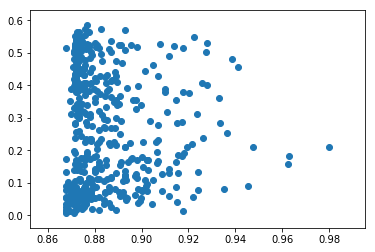

In [48]:
cols = ['TOUCH_TIME', 'SHOT_DIST']
rescale_columns(data, cols, 500)